## Distribuição de Frequência 

In [1]:
# Bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Criando os dados
dados = np.array(
    [
        160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
        164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
        155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153
    ]
)

### Ordenação

In [3]:
# Ordenados os dados
dados = np.sort(dados)
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [4]:
# Criando as variáveis miníma e máxima 
minimo = dados.min()
maximo = dados.max()
minimo, maximo

(150, 173)

In [5]:
# Valores únicos 
np.unique(dados, return_counts=True)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 5, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1],
       dtype=int64))

<BarContainer object of 40 artists>

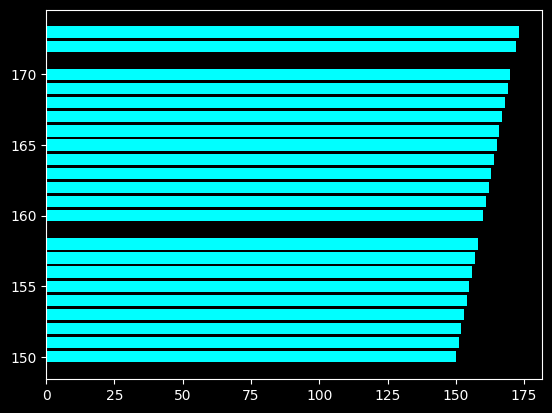

In [6]:
# Visualizando o gráfico 
plt.barh(dados, dados, color='cyan')

## Número de classes

- i = 1 + 3.3 log n

In [7]:
# definido o N
n = len(dados)
n

40

In [8]:
# Formula de Sturger
i = 1 + 3.3 * np.log10(n)
i

6.286797971382275

In [9]:
# Arrendondado o valor de i
i = round(i)
i

6

## Amplitude do intervalo
h = AA / i
AA = Xmax - Xmin

In [10]:
# Amplitude amostral
AA = maximo - minimo
AA

23

In [11]:
# Amplitude do intervalo de classe
h = AA / i
h

3.8333333333333335

In [12]:
# Biblioteca
from math import ceil
h = ceil(h)
h

4